# Milestone 1
* This is a preliminary milestone to let you set up goals for your final project and assess the feasibility of your ideas. Please, fill the following sections about your project. (max. 2000 characters per section)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
sns.set(color_codes=True)

In [3]:
''' Comment this if not using Google Colab '''
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Dataset


* Find a dataset (or multiple) that you will explore. Assess the quality of the data it contains and how much preprocessing / data-cleaning it will require before tackling visualization. We recommend using a standard dataset as this course is not about scraping nor data processing.

## Problematic

* Frame the general topic of your visualization and the main axis that you want to develop.

  * What am I trying to show with my visualization?
  * Think of an overview for the project, your motivation, and the target audience.

## Exploratory Data Analysis

* Pre-processing of the data set you chose:

  * Show some basic statistics and get insights about the data

In [0]:
# TODO: Label all axes & give title to each graph

In [0]:
# Import data for Google Colab
# TODO: We can remove stats and abilities datasets if we won't use them for sure
df_stats = pd.read_csv('drive/My Drive/pokemon/dataset_stats.csv') 
df_abilities = pd.read_csv('drive/My Drive/pokemon/dataset_abilities.csv')
df = pd.read_csv('drive/My Drive/pokemon/first6gens.csv') # merged dataset

In [0]:
# Import data for Jupyter Lab
df = pd.read_csv('data/first6gens.csv')
df_abilities = pd.read_csv('data/dataset_abilities.csv')

In [5]:
df.shape

(721, 44)

In [6]:
df.columns

Index(['pokedex_number', 'name', 'type1', 'type2', 'hp', 'defense', 'attack',
       'sp_defense', 'sp_attack', 'speed', 'base_total', 'capture_rate',
       'base_happiness', 'experience_growth', 'height_m', 'weight_kg',
       'percentage_male', 'is_legendary', 'generation', 'classfication',
       'Color', 'Body_Style', 'hasMegaEvolution', 'Egg_Group_1', 'Egg_Group_2',
       'base_egg_steps', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water'],
      dtype='object')

There are 721 pokemon with 44 features in our dataset, which includes the first 6 generations of Pokemon.

In [0]:
# Plots groupby_var-wise LINE histogram of a given 'var' wrt a given 'groupby_var' 
# e.g. var: 'attack', groupby_var: 'generation; --> attack distribution over generations
def plot_grouped_line_hist(df, var, groupby_var):
  df_var = df.groupby([groupby_var,var])['name'].count()\
                              .to_frame().reset_index()
                                                 
  df_var = df_var.rename(columns={"name":"count"})
  plt.figure(figsize=(13,7))
  ax = sns.lineplot(x=var, y="count",hue=groupby_var,palette=sns.color_palette("husl", 6),
                    data=df_hp)
  ttl=plt.title(str(var) + ' distribution over ' + str(groupby_var))

In [0]:
# Plots groupby_var-wise BOX histogram of a given 'var' wrt a given 'groupby_var' 
# e.g. var: 'attack', groupby_var: 'generation; --> attack distribution over generations
def plot_grouped_box_hist(df, var, groupby_var):
  fig,ax = plt.subplots(figsize=(13,7))
  hatches = ('','','','','',',')         # fill pattern
  for (i, d),hatch in zip(df.groupby(groupby_var), hatches):
      fig=d[var].hist(alpha=0.7,bins=7, ax=ax, label= str(groupby_var) + ' ' + str(i), hatch=hatch)
  lg =ax.legend()
  ttl=plt.title(str(var) + ' distribution over ' + str(groupby_var))

### Feature-group 1
1. If any of your features need preprocessing, preprocess it. 

2. Plot the distribution (i.e. histogram / bar chart ) of each feature. 

3. Plot scatterplots between meaningful pairs of features to identify any possible correlation. Also compute the correlation coefficients (Pearson and Spearman). 

4. Also consider any possible correlations that could occur between your set of features and the features from other groups.

5. EXPLAIN WHY FOR EACH OF THESE COMPUTATIONS

	•	percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
	•	type1: The Primary Type of the Pokemon
	•	type2: The Secondary Type of the Pokemon
	•	classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
	•	height_m: Height of the Pokemon in metres
	•	weight_kg: The Weight of the Pokemon in kilograms
	•	capture_rate: Capture Rate of the Pokemon
	•	abilities: A stringified list of abilities that the Pokemon is capable of having
	•	experience_growth: The Experience Growth of the Pokemon

#### Preprocessing group 1 / preliminary informations

In [0]:
selected_ = ['pokedex_number','name','type1', 'type2','classfication',\
            'height_m', 'weight_kg','capture_rate',
            'experience_growth','generation']
df = df[selected_]
df_abilities = df_abilities[['pokedex_number','name','abilities','generation']]
df_abilities = df_abilities[df_abilities.generation < 7] # keeping first 6 generations 

In [0]:
df_groupe1 = pd.merge(df, df_abilities, how='left', on=['pokedex_number','name','generation'])

In [0]:
df_groupe1.head()

,pokedex_number,name,type1,type2,classfication,height_m,weight_kg,capture_rate,experience_growth,generation,abilities
0,1,Bulbasaur,grass,poison,Seed Pokémon,0.7,6.9,45,1059860,1,"['Overgrow', 'Chlorophyll']"
1,2,Ivysaur,grass,poison,Seed Pokémon,1.0,13.0,45,1059860,1,"['Overgrow', 'Chlorophyll']"
2,3,Venusaur,grass,poison,Seed Pokémon,2.0,100.0,45,1059860,1,"['Overgrow', 'Chlorophyll']"
3,4,Charmander,fire,NaN,Lizard Pokémon,0.6,8.5,45,1059860,1,"['Blaze', 'Solar Power']"
4,5,Charmeleon,fire,NaN,Flame Pokémon,1.1,19.0,45,1059860,1,"['Blaze', 'Solar Power']"


In [0]:
print("total null values: ", df_groupe1.isna().sum().sum())

total null values:  393


In [0]:
df_groupe1.loc[:, df_groupe1.isna().any()]

,type2,height_m,weight_kg
0,poison,0.7,6.9
1,poison,1.0,13.0
2,poison,2.0,100.0
3,NaN,0.6,8.5
4,NaN,1.1,19.0
...,...,...,...
716,flying,5.8,203.0
717,ground,5.0,284.6
718,fairy,0.7,8.8
719,ghost,NaN,NaN


In [0]:
df_groupe1[df_groupe1.height_m.isna()].shape

(19, 11)

In [0]:
print("missing height and weight : ",19 )

missing height and weight :  19


In [0]:
df_groupe1[df_groupe1.type2.isna()].shape

(355, 11)

In [0]:
print("pokemons with one type : ",355 )

pokemons with one type :  355


In [0]:
df_groupe1['height_m'] = df_groupe1['height_m'].fillna(0)
df_groupe1['weight_kg'] = df_groupe1['weight_kg'].fillna(0)

In [0]:
pd.concat([df_groupe1.min().rename('min'), df_groupe1.max().rename('max')], axis=1)

,min,max
pokedex_number,1,721
name,Abomasnow,Zygarde
type1,bug,water
classfication,Abundance Pokémon,Zen Charm Pokémon
height_m,0,14.5
weight_kg,0,950
capture_rate,3,255
experience_growth,600000,1640000
generation,1,6
abilities,"['Adaptability', 'Download', 'Analytic']","['Wonder Skin ', 'Magic Guard', 'Tinted Lens']"


In [0]:
#stripping strings out of list of string
df_groupe1.abilities=df_groupe1.abilities.apply(lambda x: x.strip("[]").replace('\'','')\
                                        .split(", "))

#### Distribution plots group 1 
For the moment i plot distribution in everry possible way, i'll filter after depending on the relevence


First the continues variables then categorical ones

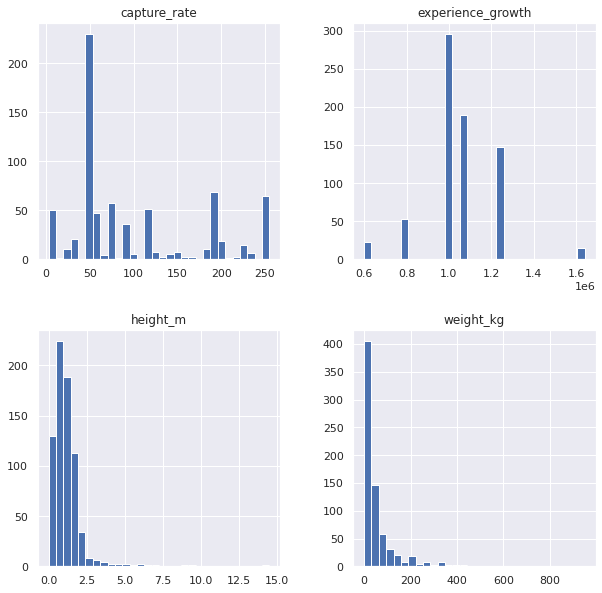

In [0]:
#distribution of continuous variables
fig = df_groupe1[['height_m','weight_kg','capture_rate','experience_growth']]\
.hist(figsize=(10,10), bins= 30)


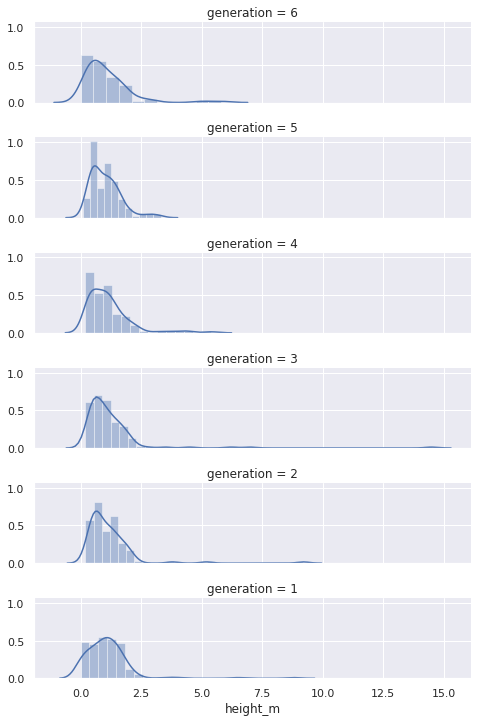

In [0]:
# Height distribution per generation 
ordered_days = df_groupe1.generation.value_counts().sort_index(ascending=False).index
g = sns.FacetGrid(df_groupe1, row="generation", row_order=ordered_days,
                  height=1.7, aspect=4)
g.map(sns.distplot, "height_m", hist=True, rug=False);

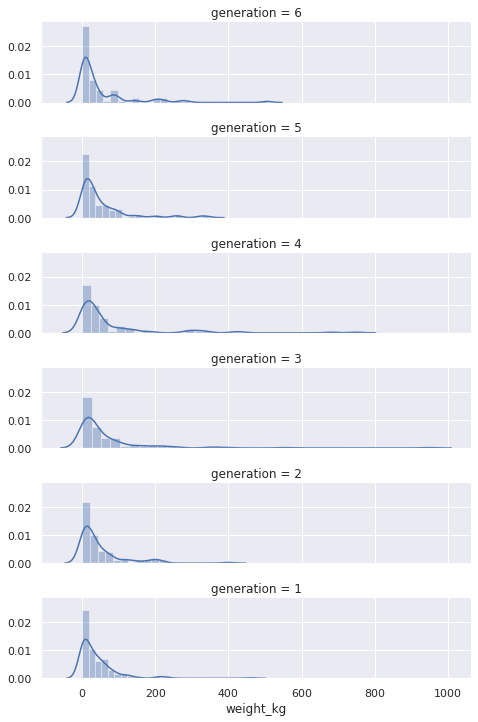

In [0]:
#weight  distribution per generation 
ordered_days =df_groupe1.generation.value_counts().sort_index(ascending=False).index
g = sns.FacetGrid(df_groupe1, row="generation", row_order=ordered_days,
                  height=1.7, aspect=4)
g.map(sns.distplot, "weight_kg", hist=True, rug=False);

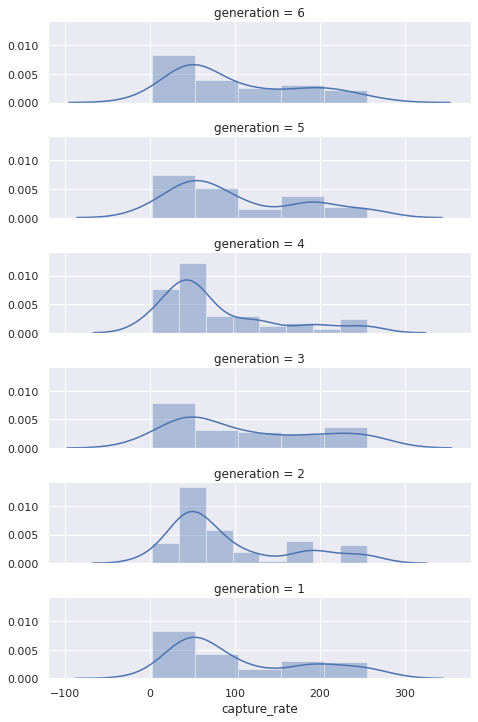

In [0]:
#capture rate distribution per generation 
ordered_days = df_groupe1.generation.value_counts().sort_index(ascending=False).index
g = sns.FacetGrid(df_groupe1, row="generation", row_order=ordered_days,
                  height=1.7, aspect=4)
g.map(sns.distplot, "capture_rate", hist=True, rug=False);

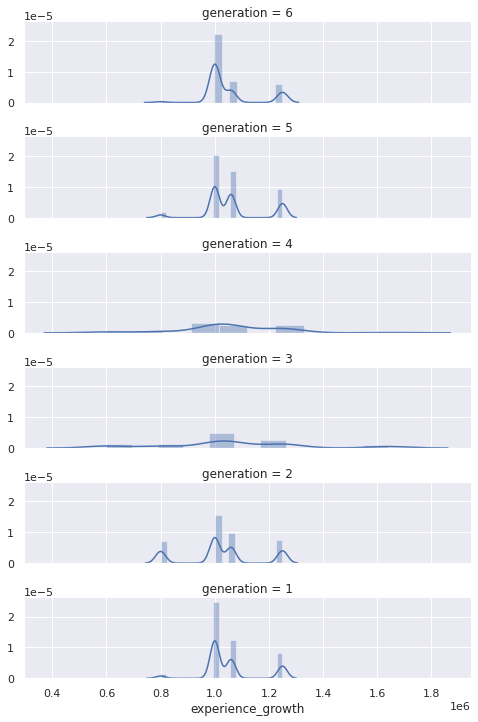

In [0]:
#growth experience distribution per generation 
ordered_days =df_groupe1.generation.value_counts().sort_index(ascending=False).index
g = sns.FacetGrid(df_groupe1, row="generation", row_order=ordered_days,
                  height=1.7, aspect=4)
g.map(sns.distplot, "experience_growth", hist=True, rug=False);

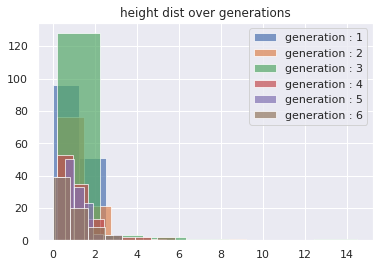

In [0]:
fig,ax = plt.subplots()

hatches = ('','','','','',',')         # fill pattern
for (i, d),hatch in zip(df_groupe1.groupby('generation'), hatches):
    fig=d['height_m'].hist(alpha=0.7,bins=7, ax=ax, label='generation : '+str(i), hatch=hatch)
lg =ax.legend()
ttl=plt.title('height dist over generations')

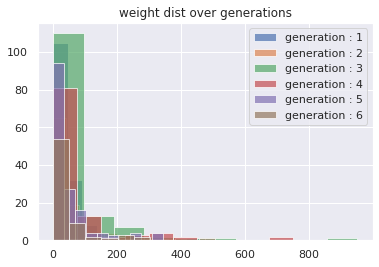

In [0]:
fig,ax = plt.subplots()

hatches = ('','','','','',',')         # fill pattern
for (i, d),hatch in zip(df_groupe1.groupby('generation'), hatches):
    fig=d['weight_kg'].hist(alpha=0.7, ax=ax,bins=10,label='generation : '+str(i), hatch=hatch)
lg =ax.legend()
ttl=plt.title('weight dist over generations')

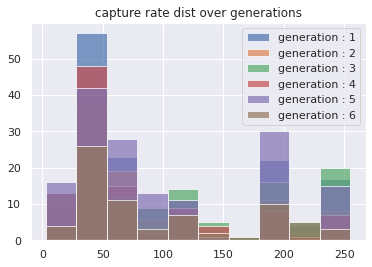

In [0]:
fig,ax = plt.subplots()

hatches = ('','','','','',',')         # fill pattern
for (i, d),hatch in zip(df_groupe1.groupby('generation'), hatches):
    fig=d['capture_rate'].hist(alpha=0.7, ax=ax, label='generation : '+str(i), hatch=hatch)
lg =ax.legend()
ttl=plt.title('capture rate dist over generations')

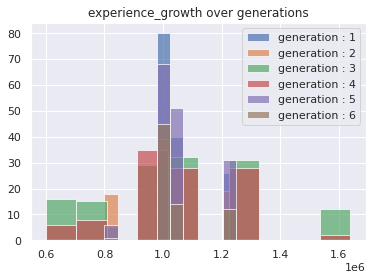

In [0]:
fig,ax = plt.subplots()

hatches = ('','','','','',',')         # fill pattern
for (i, d),hatch in zip(df_groupe1.groupby('generation'), hatches):
    fig=d['experience_growth'].hist(alpha=0.7, ax=ax, label='generation : '+str(i), hatch=hatch)
lg =ax.legend()
ttl=plt.title('experience_growth over generations')

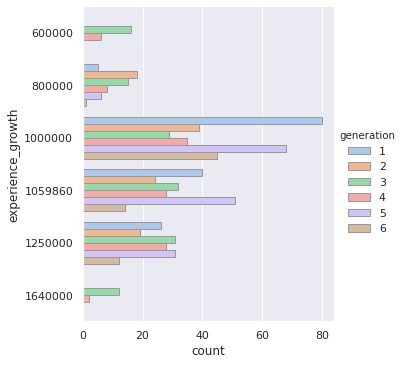

In [0]:
sns.catplot(y="experience_growth", hue="generation", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_groupe1);

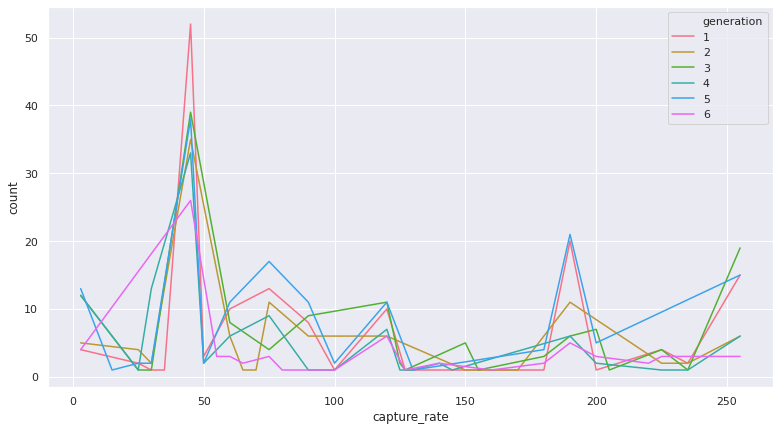

In [0]:

## other way of seeing distribution 

med_growth_evol= df_groupe1.groupby(['generation','capture_rate'])['name'].count()\
                              .to_frame().reset_index()
                                                   
med_growth_evol=med_growth_evol.rename(columns={"name":"count"})
plt.figure(figsize=(13,7))
ax = sns.lineplot(x="capture_rate", y="count",hue='generation',palette=sns.color_palette("husl", 6),
                   data=med_growth_evol)

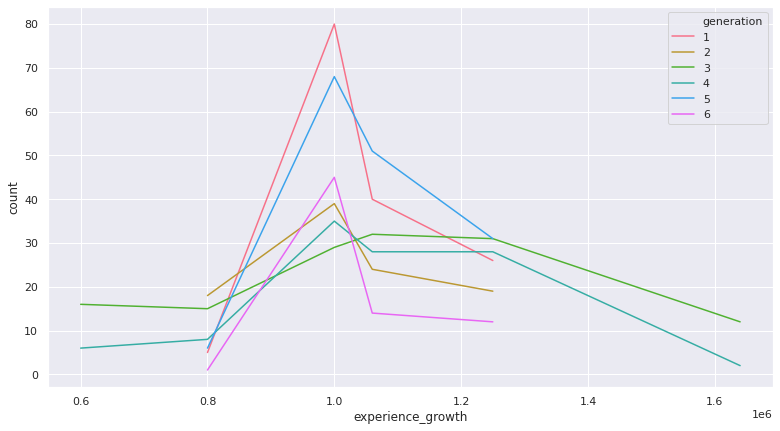

In [0]:
## other way of seeing distribution 

med_growth_evol= df_groupe1.groupby(['generation','experience_growth'])['name'].count()\
                              .to_frame().reset_index()
                                                   
med_growth_evol=med_growth_evol.rename(columns={"name":"count"})
plt.figure(figsize=(13,7))
ax = sns.lineplot(x="experience_growth", y="count",hue='generation',palette=sns.color_palette("husl", 6),
                   data=med_growth_evol)

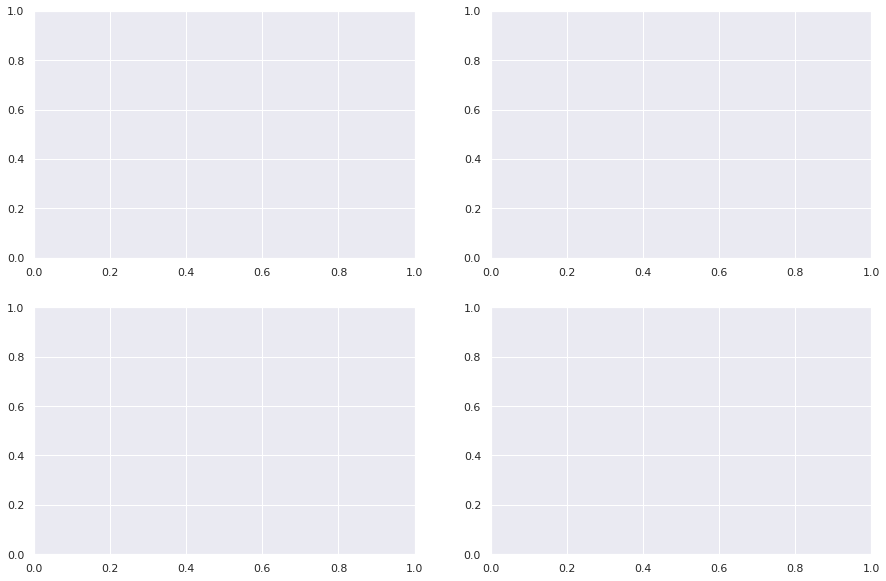

In [0]:
fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(15, 10))
list_=['height_m', 'weight_kg', 'capture_rate','experience_growth']
for i, ax in zip(range(4), axes.flat):
    sns.catplot(x="generation", y=list_[i], kind="box",ax=ax,orient='v', data=df_groupe1)
    plt.close()

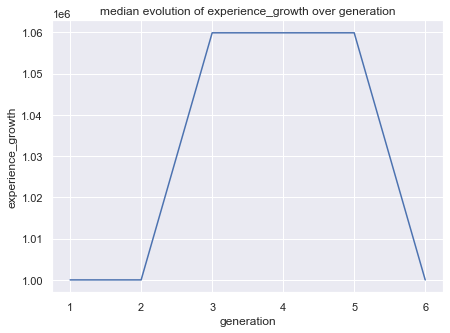

In [0]:
med_growth_evol= df_groupe1.groupby('generation')['experience_growth'].median()\
                              .to_frame().reset_index()
                                                   

plt.figure(figsize=(7,5))
plt.title('median evolution of experience_growth over generation')
ax = sns.lineplot(x="generation", y="experience_growth",
                   data=med_growth_evol)

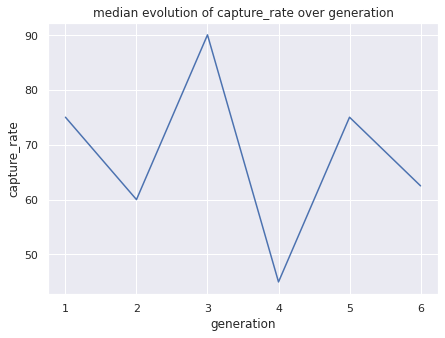

In [0]:
med_growth_evol= df_groupe1.groupby('generation')['capture_rate'].median()\
                              .to_frame().reset_index()
                                                   

plt.figure(figsize=(7,5))
plt.title('median evolution of capture_rate over generation')
ax = sns.lineplot(x="generation", y="capture_rate",data=med_growth_evol)

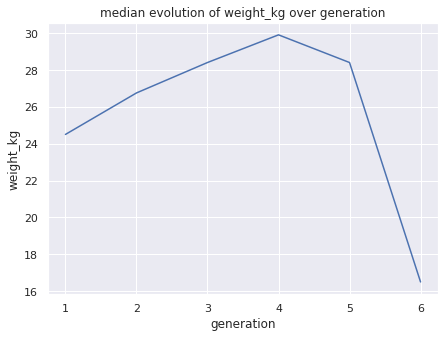

In [0]:
med_growth_evol= df_groupe1.groupby('generation')['weight_kg'].median()\
                              .to_frame().reset_index()
                                                   

plt.figure(figsize=(7,5))
plt.title('median evolution of weight_kg over generation')
ax = sns.lineplot(x="generation", y="weight_kg",data=med_growth_evol)

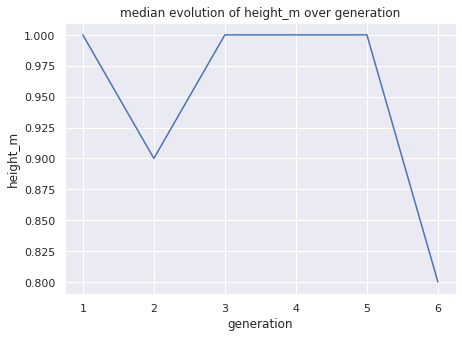

In [0]:
med_growth_evol= df_groupe1.groupby('generation')['height_m'].median()\
                              .to_frame().reset_index()
                                                   

plt.figure(figsize=(7,5))
plt.title('median evolution of height_m over generation')
ax = sns.lineplot(x="generation", y="height_m",data=med_growth_evol)

In [0]:
#most present abilities all generation together 
df_groupe1.abilities.explode().value_counts().sort_values(ascending=False).to_frame()\
                              

,abilities
Sturdy,39
Swift Swim,38
Chlorophyll,35
Levitate,32
Keen Eye,31
...,...
Flower Gift,1
Battle Bond,1
Color Change,1
Wonder Guard,1


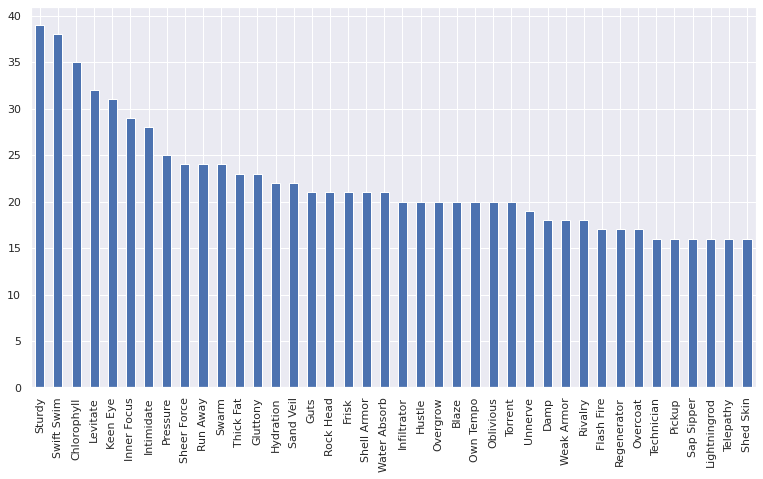

In [0]:
plt.figure(figsize=(13,7))

plot=df_groupe1.abilities.explode().value_counts().sort_values(ascending=False)[:40]\
    .plot(kind='bar')



In [0]:
#most present abilities all generation together 
top_abs=df_groupe1.groupby('generation')['abilities'].apply(lambda x: x.explode())\
                                             .to_frame().count(level='generation')\
                                             .reset_index()
                                            
top_abs.head()                                  

,generation,abilities
0,1,438
1,2,261
2,3,309
3,4,246
4,5,400


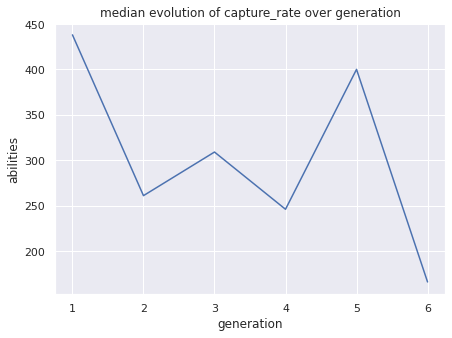

In [0]:
plt.figure(figsize=(7,5))
plt.title('median evolution of capture_rate over generation')
ax = sns.lineplot(x="generation", y="abilities",data=top_abs)

In [0]:
#most present abilities generation wise
abs_gen=df_groupe1.groupby('generation')['abilities'].apply(lambda x: x.explode())\
                                            .to_frame().reset_index()\
                                            .rename(columns={'level_1':'pokedex_numbder'})\
                                            .groupby('generation')['abilities']\
                                            .value_counts().sort_values(ascending=False)\
                                            .to_frame()\
                                            .rename(columns={'abilities':'count'})\
                                            .reset_index()
abs_gen.head()
                                            


,generation,abilities,count
0,1,Swift Swim,13
1,1,Chlorophyll,12
2,5,Swarm,12
3,1,Inner Focus,11
4,1,Run Away,11


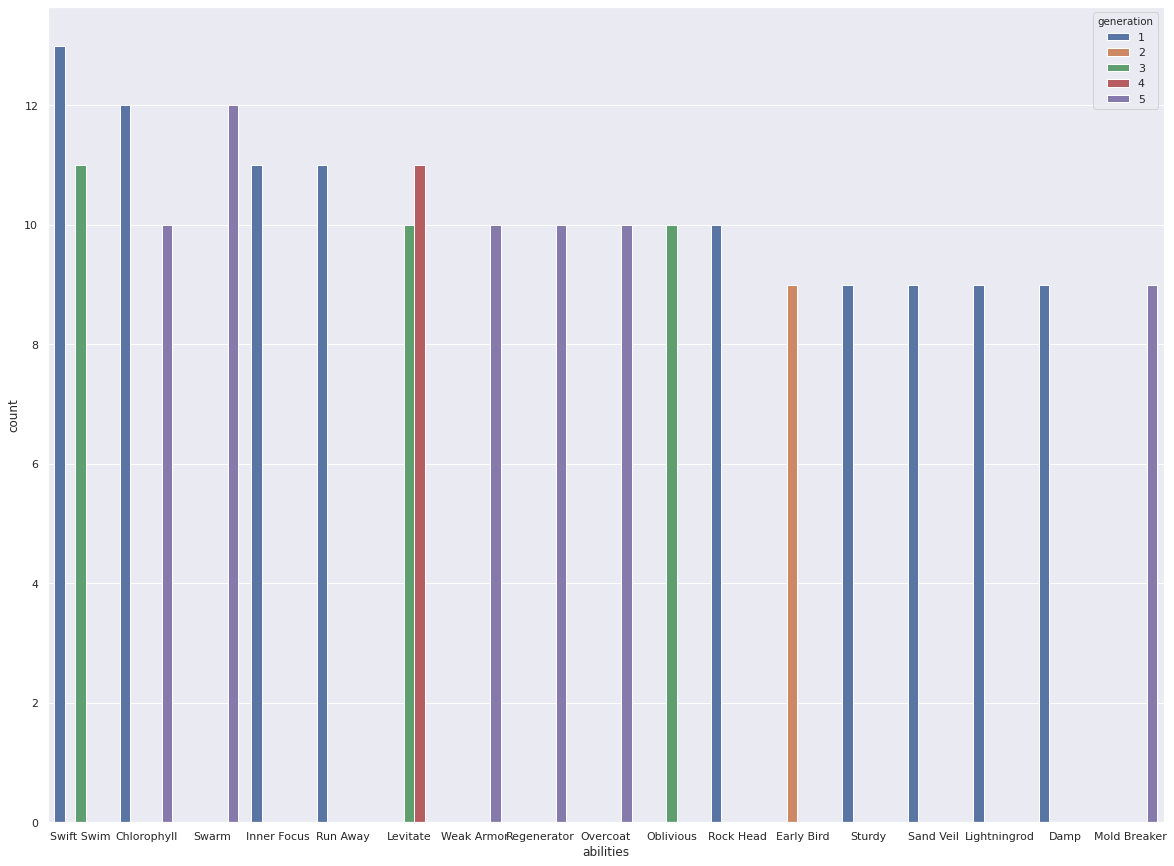

In [0]:
plt.figure(figsize=(20,15))
ax = sns.barplot(x="abilities", y="count", hue="generation", data=abs_gen[:20])



In [0]:
all_classes=set(df_groupe1['type1']).union(set(df_groupe1['type2']))
all_classes.remove(np.nan)
print(all_classes)

{'fire', 'ice', 'ghost', 'flying', 'poison', 'ground', 'fighting', 'dark', 'dragon', 'grass', 'normal', 'steel', 'rock', 'psychic', 'bug', 'electric', 'fairy', 'water'}


In [0]:
df_groupe1["types"]= df_groupe1.applymap(lambda x: x)\
                                .apply(lambda x: [x.type1,x.type2], axis=1)



In [0]:
#most present abilities all generation together 
types = df_groupe1.types.explode().value_counts().sort_values(ascending=False)\
                    .to_frame()
types.head()

,types
water,118
normal,97
flying,90
grass,85
psychic,74


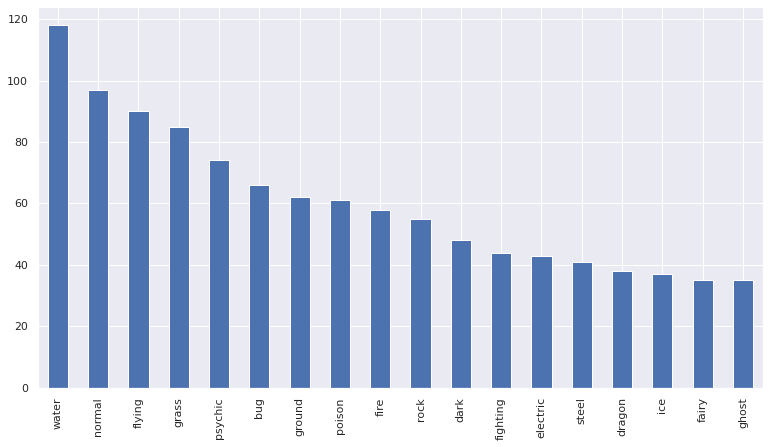

In [0]:
plt.figure(figsize=(13,7))

plot=df_groupe1.types.explode().value_counts().sort_values(ascending=False)[:40]\
    .plot(kind='bar')



In [0]:
plt.figure(figsize=(20,15))
ax = sns.barplot(x="types", y="count", hue="generation", data=types_gens)


NameError: ignored

<Figure size 1440x1080 with 0 Axes>

In [0]:
types_gens[types_gens.generation==1]

NameError: ignored

In [0]:

types_gens=df_groupe1.groupby('generation')['types'].apply(lambda x: x.explode())\
                                            .to_frame().reset_index()\
                                            .rename(columns={'level_1':'pokedex_numbder'})\
                                            .groupby('generation')['types']\
                                            .value_counts().sort_values(ascending=False)\
                                            .to_frame()\
                                            .rename(columns={'types':'count'})\
                                            .reset_index()
                                            
types_gens.head()
                                            

,generation,types,count
0,1,poison,35
1,1,water,32
2,3,water,28
3,1,normal,22
4,5,grass,20


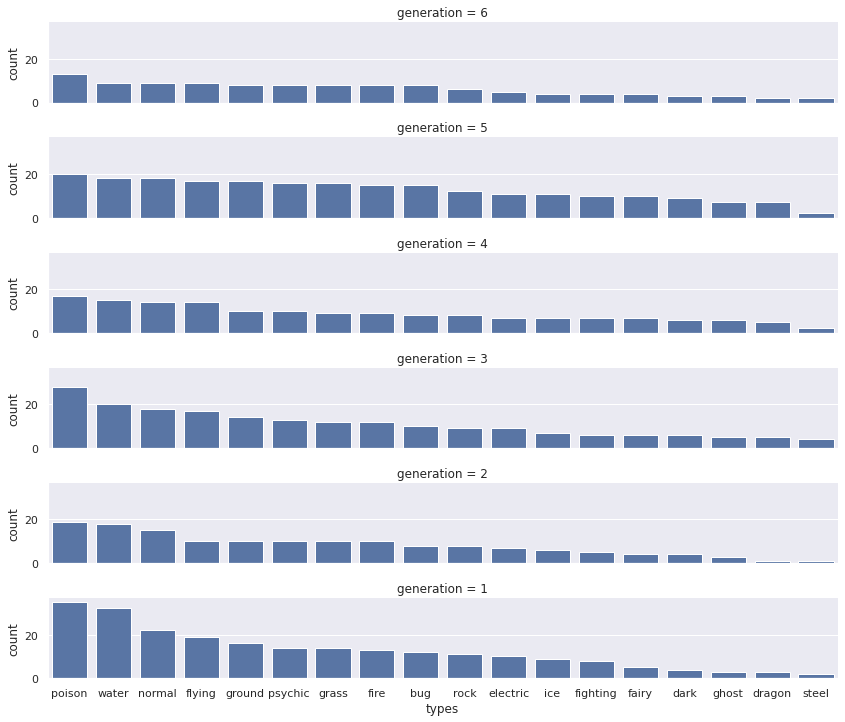

In [0]:

#need fixing for x axis 
ordered_days = types_gens.generation.value_counts().sort_index(ascending=False).index
g = sns.FacetGrid(types_gens, row="generation", row_order=ordered_days,
                  height=1.7, aspect=7)
g.map(sns.barplot,"types","count");

### Feature-group 2
1. If any of your features need preprocessing, preprocess it. 

2. Plot the distribution (i.e. histogram / bar chart ) of each feature. 

3. Plot scatterplots between meaningful pairs of features to identify any possible correlation. Also compute the correlation coefficients (Pearson and Spearman). 

4. Also consider any possible correlations that could occur between your set of features and the features from other groups.

5. EXPLAIN WHY FOR EACH OF THESE COMPUTATIONS



	•	against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
	•	hp: The Base HP of the Pokemon
	•	attack: The Base Attack of the Pokemon
	•	defense: The Base Defense of the Pokemon
	•	sp_attack: The Base Special Attack of the Pokemon
	•	sp_defense: The Base Special Defense of the Pokemon
	•	speed: The Base Speed of the Pokemon
	•	is_legendary: Denotes if the Pokemon is legendary.
	•	Total. Sum of all the base stats (Health Points, Attack, Defense, Special Attack, Special Defense, and Speed).

In [0]:
selected_2 = ['pokedex_number','name','hp','attack','defense','sp_attack',\
             'sp_defense','speed','is_legendary','base_total','generation']
df2 = df[selected_2]

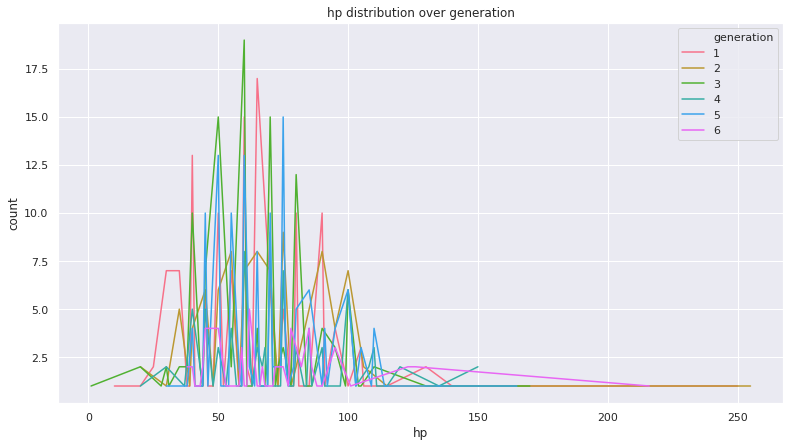

In [45]:
# Generation-wise hp distribution looks too cluttered when visualized with a line histogram
plot_genwise_line_hist(df2, 'hp', 'generation')

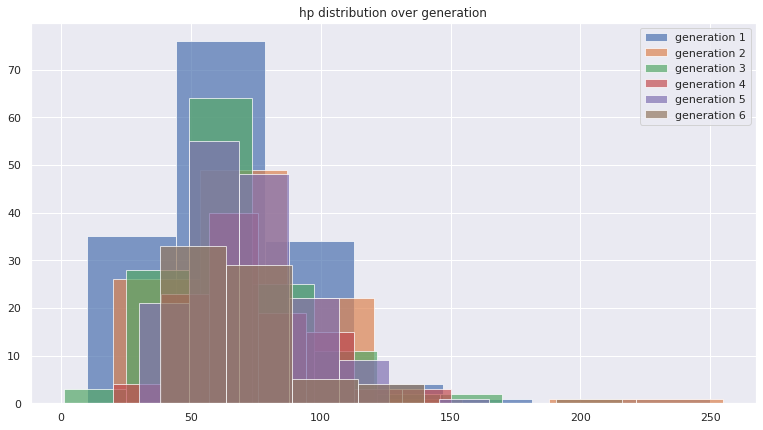

In [46]:
plot_genwise_box_hist(df2, 'hp', 'generation')

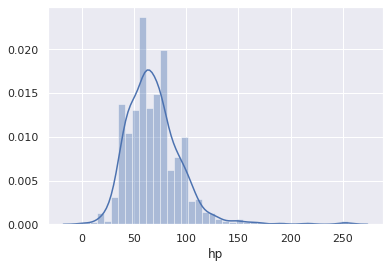

In [36]:
# Average hp of pokemon in all generations
sns.distplot(df['hp']);

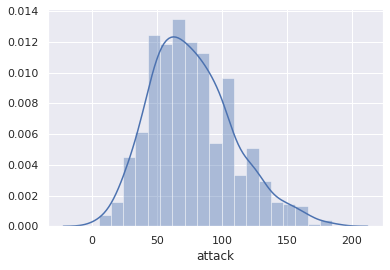

In [0]:
sns.distplot(df['attack']);

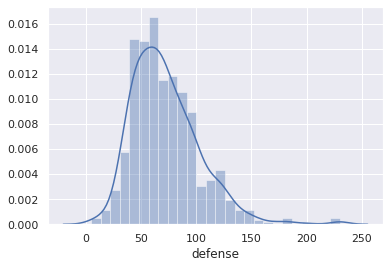

In [0]:
sns.distplot(df['defense']);

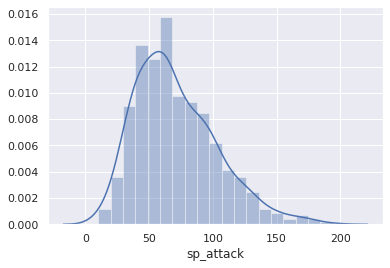

In [0]:
sns.distplot(df['sp_attack']);

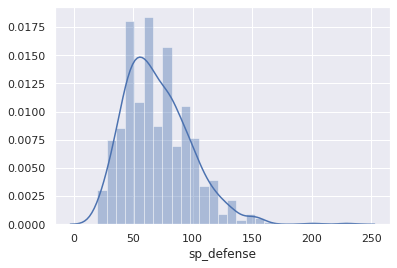

In [0]:
sns.distplot(df['sp_defense']);

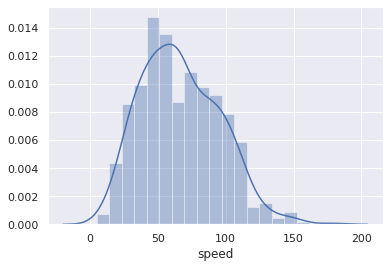

In [0]:
sns.distplot(df['speed']);

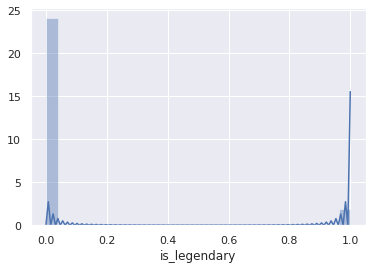

In [0]:
sns.distplot(df['is_legendary']);

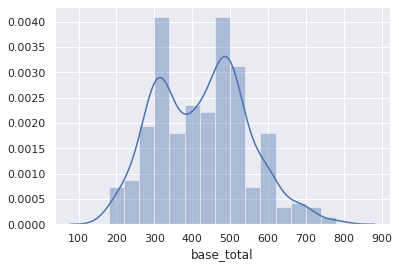

In [0]:
sns.distplot(df['base_total']);

#### Against_?

There are 18 against_? categories. 

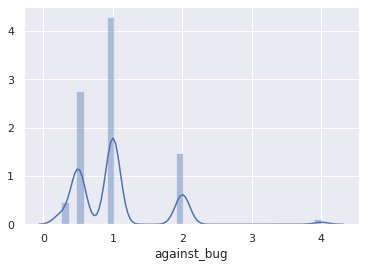

In [0]:
sns.distplot(df['against_bug']);

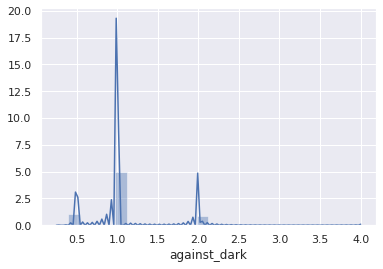

In [0]:
sns.distplot(df['against_dark']);

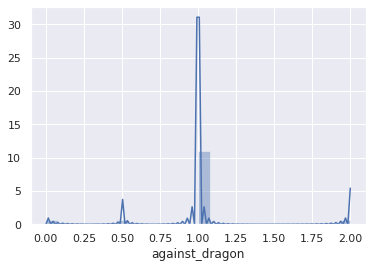

In [0]:
sns.distplot(df['against_dragon']);

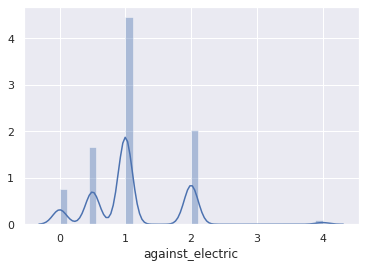

In [0]:
sns.distplot(df['against_electric']);

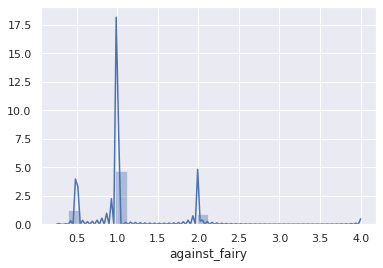

In [0]:
sns.distplot(df['against_fairy']);

In [0]:
# TODO: Add a new column that is the sum of all against_? columns and plot its distribution

### Feature-group 3

1. If any of your features need preprocessing, preprocess it. 

2. Plot the distribution (i.e. histogram / bar chart ) of each feature. 

3. Plot scatterplots between meaningful pairs of features to identify any possible correlation. Also compute the correlation coefficients (Pearson and Spearman). 

4. Also consider any possible correlations that could occur between your set of features and the features from other groups.

5. EXPLAIN WHY FOR EACH OF THESE COMPUTATIONS

	•	base_happiness: Base Happiness of the Pokemon
	•	Color. Color of the Pokémon according to the Pokédex.
	•	hasGender. Boolean that indicates if the Pokémon can be classified as female or male.
	•	EggGroup1. Egg Group of the Pokémon.
	•	EggGroup2. Second Egg Group of the Pokémon, in case it has two.
	•	baseeggsteps: The number of steps required to hatch an egg of the Pokemon
	•	hasMegaEvolution. Boolean that indicates whether the Pokémon is able to Mega-evolve or not.
	•	Body_Style. Body Style of the Pokémon according to the Pokédex.


## Related Work

* What others have already done with the data?
* Why is your approach original?
* What source of inspiration do you take? Visualizations that you found on other websites or magazines (might be unrelated to your data).
* In case you are using a dataset that you have already explored in another context (ML or ADA course, semester project...), you are required to share the report of that work to outline the differences with the submission for this class.